In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [8]:
import random

In [1473]:
class line:
    
    def __init__(self, canvas, thickness=3, color=(0,0,0)):
        self.type = "line"
        self.p1 = (random.randint(0, canvas.shape[0]), random.randint(0, canvas.shape[1]))
        self.p2 = (random.randint(0, canvas.shape[0]), random.randint(0, canvas.shape[1]))
        self.thickness  = thickness
        self.color = color
        
    def draw_on(self, canvas):
        return cv2.line(canvas, self.p1, self.p2, self.color, self.thickness) 
        
class circle:
    
    def __init__(self, canvas, thickness=-1, color=(0,0,0), radius=-1):
        self.type = "circle"
        self.center = (random.randint(0, canvas.shape[0]), random.randint(0, canvas.shape[1]))
        self.radius = radius
        if self.radius==-1:
            self.radius = random.randint(10, canvas.shape[0]//2)
        self.thickness  = thickness
        self.color = color
   
    def draw_on(self, canvas):
        return cv2.circle(canvas, self.center, self.radius, self.color, self.thickness)
    
class arc:
    
    def __init__(self, canvas, thickness=-1, color=(0,0,0)):
        self.type = "circle"
        
        padding = 40
        
        self.center      = (random.randint(padding, canvas.shape[0]-padding), random.randint(padding, canvas.shape[0]-padding))
        self.radius1     = random.randint(20, 20+canvas.shape[0]-self.center[0])
        self.radius2     = random.randint(20, 20+canvas.shape[0]-self.center[1])
        self.angle       = random.randint(0, 360)
        self.start_angle = random.randint(0, 180)
        self.end_angle   = random.randint(self.start_angle+30, 360-30)
        self.thickness   = thickness
        self.color = color
   
    def draw_on(self, canvas):
        axes=(self.radius1, self.radius2)
        return cv2.ellipse(canvas, self.center, axes, self.angle, 
                           self.start_angle, self.end_angle, self.color, self.thickness)
    
    
class tableau:
    
    def __init__(self, shape, color=(255,255,255)):    
        self.canvas = np.ones((shape[0], shape[1], 3))*np.array(color)
        
    def display_with(self, entities):
        temp_canvas = np.copy(self.canvas)
        for entity in entities:
            temp_canvas = entity.draw_on(temp_canvas) 
        end_result = temp_canvas.astype(int)
        plt.imshow(end_result)
        return end_result

In [1444]:
tableau1 = tableau([224,224], color=(200,200,200))

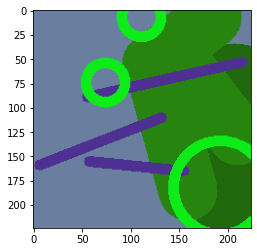

In [1676]:
entities = []

#color0 = (230,230,230)

color0 = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
color1 = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
color2 = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
color3 = (random.randint(0,255), random.randint(0,255), random.randint(0,255))

tableau1 = tableau([224,224], color=color0)

entities = []

entities.append(line(tableau1.canvas, thickness=100, color=np.array(color1)*.8))
entities.append(line(tableau1.canvas, thickness=60, color=color1))
entities.append(line(tableau1.canvas, thickness=60, color=color1))
entities.append(line(tableau1.canvas, thickness=60, color=color1))

entities.append(line(tableau1.canvas, thickness=10, color=color2))
entities.append(line(tableau1.canvas, thickness=10, color=color2))
entities.append(line(tableau1.canvas, thickness=10, color=color2))

entities.append(circle(tableau1.canvas, thickness=10, color=color3))
entities.append(circle(tableau1.canvas, radius=20, thickness=10, color=color3))
entities.append(circle(tableau1.canvas, radius=20, thickness=10, color=color3))

tableau1.display_with(entities)
pass

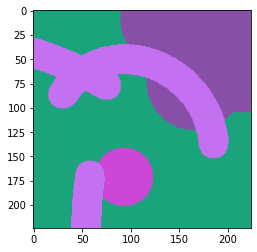

In [1675]:
entities = []

color0 = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
color1 = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
color2 = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
color3 = (random.randint(0,255), random.randint(0,255), random.randint(0,255))

tableau1 = tableau([224,224], color=color0)

entities.append(arc(tableau1.canvas, thickness=100, color=np.array(color1)*.7))
entities.append(arc(tableau1.canvas, thickness=100, color=np.array(color1)*.7))

entities.append(circle(tableau1.canvas, radius=30, thickness=-1, color=color3))

entities.append(arc(tableau1.canvas, thickness=30, color=color1))
entities.append(arc(tableau1.canvas, thickness=30, color=color1))
entities.append(arc(tableau1.canvas, thickness=30, color=color1))


tableau1.display_with(entities)
pass